In [1]:
import pandas as pd
import numpy as np
%matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
plt.style.use('seaborn-whitegrid')
import re

Using matplotlib backend: TkAgg


In [2]:
raw_df = pd.read_excel('../Thesis-data/Hematite kinetic exp 2 3312018.xlsx')

In [3]:
raw_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Sample Name,NaN,GAMMA Analyte Peak Area,BETA Analyte Peak Area (counts),ALPHA Analyte Peak Area (counts)
5,.1 STD,NaN,68268,7007.3,9455.4
6,.1 STD,NaN,77302,7455.6,9379.8
7,.5 STD,NaN,345160,33035,47852
8,.5 STD,NaN,362500,33137,49685
9,1.0 STD,NaN,670920,66302,102390


In [4]:
raw_df.dropna(axis='columns',how='all',inplace=True)

In [5]:
raw_df.dropna(inplace=True)

In [6]:
raw_df = raw_df.reset_index(drop=True)

In [7]:
raw_df.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Sample Name,GAMMA Analyte Peak Area,BETA Analyte Peak Area (counts),ALPHA Analyte Peak Area (counts)
1,.1 STD,68268,7007.3,9455.4
2,.1 STD,77302,7455.6,9379.8
3,.5 STD,345160,33035,47852
4,.5 STD,362500,33137,49685


In [8]:
col = raw_df.columns

In [9]:
new_names = []
for i in range(len(col)):
    new_names.append(tuple([col[i],raw_df.iloc[0,i]]))

In [10]:
new_names = dict(new_names)

In [11]:
new_names

{'Unnamed: 0': 'Sample Name',
 'Unnamed: 2': 'GAMMA Analyte Peak Area ',
 'Unnamed: 3': ' BETA Analyte Peak Area (counts)',
 'Unnamed: 4': ' ALPHA Analyte Peak Area (counts)'}

In [12]:
raw_df = raw_df.rename(columns=new_names).drop(index=0)

In [13]:
raw_df.head()

,Sample Name,GAMMA Analyte Peak Area,BETA Analyte Peak Area (counts),ALPHA Analyte Peak Area (counts)
1,.1 STD,68268,7007.3,9455.4
2,.1 STD,77302,7455.6,9379.8
3,.5 STD,345160,33035,47852
4,.5 STD,362500,33137,49685
5,1.0 STD,670920,66302,102390


In [14]:
standard_df = raw_df.iloc[0:10]
experiment_df = raw_df.iloc[10:]

In [15]:
standard_df.reset_index(drop=True,inplace=True)

In [16]:
standard_df['Sample Name'] = standard_df['Sample Name'].map(lambda x: x.lstrip('+-').rstrip('SsTtDd'))

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
standard_df.head()

,Sample Name,GAMMA Analyte Peak Area,BETA Analyte Peak Area (counts),ALPHA Analyte Peak Area (counts)
0,.1,68268,7007.3,9455.4
1,.1,77302,7455.6,9379.8
2,.5,345160,33035,47852
3,.5,362500,33137,49685
4,1.0,670920,66302,102390


In [18]:
col = standard_df.columns
standard_df[col] = standard_df[col].apply(pd.to_numeric)

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [19]:
x = standard_df['Sample Name']
gamma = standard_df.columns[1]
y = standard_df[gamma]

In [20]:
y

0      68268
1      77302
2     345160
3     362500
4     670920
5     702030
6     997340
7    1000800
8    1257200
9    1251100
Name: GAMMA Analyte Peak Area , dtype: int64

In [21]:
def cost_function(x,y,w,b):
    samples = len(x)
    total_error = 0
    for i in range(samples):
        total_error += (y[i] - (w * x[i] + b)) ** 2
    return total_error/samples    

In [22]:
def update_weights(x,y,weight,bias,learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    samples = len(x)
    for i in range(samples):
        weight_deriv += -2 * x[i] * (y[i] - (weight * x[i] + bias))
        bias_deriv += -2 * (y[i] - (weight * x[i] + bias))
    weight -= (weight_deriv/samples) * learning_rate
    bias -= (bias_deriv/samples) * learning_rate
    return weight,bias

In [23]:
def train(x,y,weight,bias,learning_rate,iterations):
    cost_history = []
    for i in range(iterations):
        weight,bias = update_weights(x,y,weight,bias,learning_rate)
        cost = cost_function(x,y,weight,bias)
        cost_history.append(cost)
        if i % (iterations/10) == 0:
            print('The current weight = %s, bias = %s, and cost = %s.' % (weight,bias,cost))
        else:
            continue
    return weight,bias

In [24]:
learning_rate = .0001
iterations = 10000
weight,bias = train(x,y,0,0,learning_rate,iterations)

The current weight = 195.10294, bias = 134.6524, and cost = 634062997390.7123.
The current weight = 158103.61158003352, bias = 105997.53851116996, and cost = 266399939494.85864.
The current weight = 260614.22542317506, bias = 169145.8982564986, and cost = 118952569180.94449.
The current weight = 328054.112931214, bias = 205483.55511706375, and cost = 59276896812.426636.
The current weight = 373254.88609063014, bias = 225040.7492458999, and cost = 34626619505.752396.
The current weight = 404318.0138714419, bias = 234141.4982150793, and cost = 23992081875.290127.
The current weight = 426359.90558670287, bias = 236771.27176860007, and cost = 19001821572.81731.
The current weight = 442613.1285655517, bias = 235440.0359601032, and cost = 16317398626.227102.
The current weight = 455121.32289251947, bias = 231726.85734160373, and cost = 14604932525.825268.
The current weight = 465177.72396389244, bias = 226623.56027512994, and cost = 13329118417.486145.


In [25]:
learning_rate = .001
iterations = 10000
weight,bias = train(x,y,0,0,learning_rate,iterations)

The current weight = 1951.0294, bias = 1346.5240000000001, and cost = 629018079964.1934.
The current weight = 473721.20407238393, bias = 220712.98877881753, and cost = 12261317966.889223.
The current weight = 526558.9860356582, bias = 161441.72999986846, and cost = 5839646747.198893.
The current weight = 559325.5825935462, bias = 119715.25339040055, and cost = 2987808058.5936203.
The current weight = 581236.9855098889, bias = 91759.06004204518, and cost = 1709526327.1618671.
The current weight = 595906.436037078, bias = 73042.15843417162, and cost = 1136560005.6326072.
The current weight = 605727.6458913035, bias = 60511.17133012051, and cost = 879738369.4614998.
The current weight = 612302.9560870058, bias = 52121.662399872774, and cost = 764622785.3036731.
The current weight = 616705.1331074408, bias = 46504.87743769609, and cost = 713024337.7835889.
The current weight = 619652.3952051302, bias = 42744.43405864441, and cost = 689896280.8314259.


In [26]:
learning_rate = 0.15
iterations = 10000
weight,bias = train(x,y,0,0,learning_rate,iterations)

The current weight = 292654.41, bias = 201978.6, and cost = 81699249172.6401.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.
The current weight = 625622.7469670707, bias = 35126.79809358787, and cost = 671108093.9568459.


In [27]:
learning_rate = .001
iterations = 20000
weight,bias = train(x,y,0,0,learning_rate,iterations)

The current weight = 1951.0294, bias = 1346.5240000000001, and cost = 629018079964.1934.
The current weight = 526558.9860356582, bias = 161441.72999986846, and cost = 5839646747.198893.
The current weight = 581236.9855098889, bias = 91759.06004204518, and cost = 1709526327.1618671.
The current weight = 605727.6458913035, bias = 60511.17133012051, and cost = 879738369.4614998.
The current weight = 616705.1331074408, bias = 46504.87743769609, and cost = 713024337.7835889.
The current weight = 621625.5902475277, bias = 40226.813301880866, and cost = 679529553.8446462.
The current weight = 623831.0948399346, bias = 37412.78629407273, and cost = 672800062.9924037.
The current weight = 624819.6717889135, bias = 36151.450342517615, and cost = 671448030.1740143.
The current weight = 625262.7832598296, bias = 35586.079655501555, and cost = 671176391.088361.
The current weight = 625461.3998428475, bias = 35332.66262307489, and cost = 671121815.6432623.


In [28]:
weight = round(weight,3)
bias = round(bias, 3)

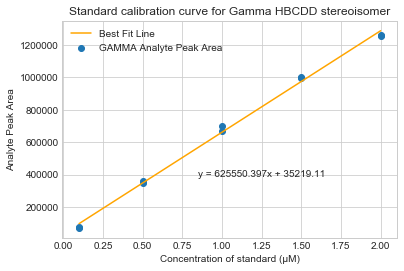

In [29]:
trend_line_x = [x[0] , x[9]]
trend_line_y = [weight * x[0] + bias, weight * x[9] + bias]
equation = 'y = ' + str(weight) + 'x + ' + str(bias)
plt.scatter(x,y)
plt.plot(trend_line_x,trend_line_y,color='orange',label='Best Fit Line')
plt.xlabel('Concentration of standard (μM)')
plt.ylabel('Analyte Peak Area')
plt.title('Standard calibration curve for Gamma HBCDD stereoisomer')
plt.text(1.25, 400000,equation, horizontalalignment='center',verticalalignment='center')
plt.legend()

In [72]:
def convert_to_concentration(x):
    return (x-bias)/weight

In [31]:
experiment_df.head()

,Sample Name,GAMMA Analyte Peak Area,BETA Analyte Peak Area (counts),ALPHA Analyte Peak Area (counts)
11,1 solid,148390,19496,52670
12,1 solid,156920,21748,52299
13,1 aqueous,710460,63864,90146
14,1 aqueous,720730,65554,91635
15,2 solid,160140,22114,53846


In [32]:
experiment_df = experiment_df.reset_index(drop=True)

In [33]:
col = experiment_df.columns
experiment_df[col] = experiment_df[col].apply(pd.to_numeric,errors='ignore')

In [34]:
experiment_df = experiment_df.groupby('Sample Name').mean()

In [35]:
experiment_df = experiment_df.reset_index()

In [36]:
experiment_df

,Sample Name,GAMMA Analyte Peak Area,BETA Analyte Peak Area (counts),ALPHA Analyte Peak Area (counts)
0,1 aqueous,715595.0,64709.0,90890.5
1,1 solid,152655.0,20622.0,52484.5
2,10 aqueous,574755.0,54958.0,96239.5
3,10 solid,131775.0,16078.5,55151.0
4,2 aqueous,874075.0,77963.0,125570.0
5,2 solid,161400.0,23315.0,53762.5
6,3 aqueous,1024750.0,101702.5,166280.0
7,3 solid,60537.5,12444.5,26352.0
8,4 aqueous,951575.0,90099.0,138240.0
9,4 solid,158385.0,22023.5,54964.5


In [37]:
experiment_aq_df = experiment_df.where(experiment_df['Sample Name'].str.contains('aqueous'))
experiment_s_df = experiment_df.where(experiment_df['Sample Name'].str.contains('solid'))

In [38]:
experiment_aq_df.dropna(inplace=True)
experiment_s_df.dropna(inplace=True)

In [39]:
experiment_aq_df = experiment_aq_df.rename(columns = {'Sample Name':'Aq Sample'})

In [40]:
experiment_s_df = experiment_s_df.rename(columns = {'Sample Name':'S Sample'})

In [41]:
experiment_aq_df['Aq Sample'] = experiment_aq_df['Aq Sample'].map(lambda x : x.rstrip('aqueous'))

In [48]:
experiment_s_df['S Sample'] = experiment_s_df['S Sample'].map(lambda x : x.rstrip(' solid'))

In [49]:
experiment_s_df

,S Sample,GAMMA Analyte Peak Area,BETA Analyte Peak Area (counts),ALPHA Analyte Peak Area (counts)
1,1,152655.0,20622.0,52484.5
3,10,131775.0,16078.5,55151.0
5,2,161400.0,23315.0,53762.5
7,3,60537.5,12444.5,26352.0
9,4,158385.0,22023.5,54964.5
11,5,147505.0,19866.5,58031.0
13,6,169040.0,21450.0,59806.5
15,7,160895.0,22734.0,56713.5
17,8,157950.0,16783.5,56924.5
19,9,153400.0,19043.5,59419.0


In [50]:
col = experiment_aq_df.columns
experiment_aq_df[col] = experiment_aq_df[col].apply(pd.to_numeric)
col = experiment_s_df.columns
experiment_s_df[col] = experiment_s_df[col].apply(pd.to_numeric)

In [53]:
experiment_s_df.reset_index(drop=True,inplace=True)
experiment_aq_df.reset_index(drop=True,inplace=True)

In [54]:
experiment= [experiment_s_df, experiment_aq_df]

In [63]:
for i in range(len(experiment)):
    experiment[i].sort_values(by =experiment[i].columns[0],inplace=True)
    experiment[i].reset_index(inplace=True)

In [69]:
experiment_s_df.drop('index', axis=1,inplace=True)
experiment_aq_df.drop('index', axis=1,inplace=True)

In [80]:
experiment_s_df[gamma] = experiment_s_df[gamma].apply(convert_to_concentration)

In [83]:
experiment_s_df = experiment_s_df.rename(columns={gamma:'Gamma Concentration'})

In [85]:
beta = standard_df.columns[2]
alpha = standard_df.columns[3]

In [90]:
experiment_s_df = experiment_s_df.rename(columns={beta:'Beta Concentration',alpha:'Alpha Concentration'})

In [89]:
experiment_aq_df.rename(columns = {gamma:'Gamma Concentration',beta:'Beta Concentration',alpha:'Alpha Concentration'})

,Aq Sample,Gamma Concentration,Beta Concentration,Alpha Concentration
0,1,715595.0,64709.0,90890.5
1,2,874075.0,77963.0,125570.0
2,3,1024750.0,101702.5,166280.0
3,4,951575.0,90099.0,138240.0
4,5,509470.0,45142.5,74927.0
5,6,657700.0,58057.5,106210.0
6,7,494555.0,40886.5,70824.0
7,8,403325.0,35585.0,58552.0
8,9,339580.0,30106.0,50624.0
9,10,574755.0,54958.0,96239.5


In [97]:
experiment_s_df
time = [1,2,3,4,24,25,26,27,28]

In [98]:
experiment_s_df.drop(9,inplace=True)

KeyError: '[9] not found in axis'

In [99]:
experiment_s_df.drop(['Beta concentration','Alpha concentration'], axis=1,inplace=True)

KeyError: "['Beta concentration' 'Alpha concentration'] not found in axis"

In [104]:
experiment_s_df['Time'] = time

In [118]:
y= experiment_s_df['Gamma Concentration']
initial_conc = y[0]
def convert_to_kinetic(x):
    return np.log(x/experiment_s_df['Gamma Concentration'][0])

In [120]:
experiment_s_df['Gamma Concentration'] = experiment_s_df['Gamma Concentration'].apply(convert_to_kinetic)

In [121]:
experiment_s_df

,S Sample,Gamma Concentration,Time
0,1,0.000000,1
1,2,0.071824,2
2,3,-1.534362,3
3,4,0.047640,4
4,5,-0.044844,24
5,6,0.130610,25
6,7,0.067814,26
7,8,0.044102,27
8,9,0.006324,28


In [122]:
y = experiment_s_df['Gamma Concentration']

In [123]:
learning_rate = .001
iterations = 20000
weight,bias = train(time,y,0,0,learning_rate,iterations)

The current weight = 0.00023356989461493827, bias = -0.00026908747138471695, and cost = 0.2651526788283173.
The current weight = 0.01232880018049738, bias = -0.29375316948696883, and cost = 0.2147137729138667.
The current weight = 0.015146862771712379, bias = -0.3625287210940696, and cost = 0.2119440244100822.
The current weight = 0.01580724585840427, bias = -0.3786455423459541, and cost = 0.2117919238019692.
The current weight = 0.015961999632343894, bias = -0.3824223485102875, and cost = 0.21178357120426694.
The current weight = 0.01599826453832224, bias = -0.3833074029872234, and cost = 0.2117831125217591.
The current weight = 0.01600676283450035, bias = -0.3835148061191454, and cost = 0.2117830873332309.
The current weight = 0.016008754320097286, bias = -0.38356340884389456, and cost = 0.21178308595000403.
The current weight = 0.016009221003630083, bias = -0.3835747983770774, and cost = 0.2117830858740442.
The current weight = 0.01600933036596743, bias = -0.38357746739340776, and c

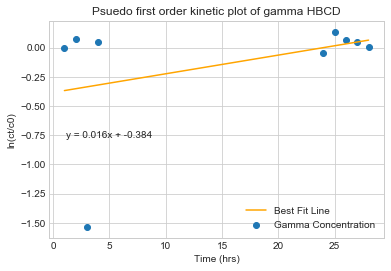

In [129]:
weight = round(weight,3)
bias = round(bias, 3)
trend_line_x = [time[0] , time[8]]
trend_line_y = [weight * time[0] + bias, weight * time[8] + bias]
equation = 'y = ' + str(weight) + 'x + ' + str(bias)
plt.scatter(time,y)
plt.plot(trend_line_x,trend_line_y,color='orange',label='Best Fit Line')
plt.xlabel('Time (hrs)')
plt.ylabel('ln(ct/c0)')
plt.title('Psuedo first order kinetic plot of gamma HBCD')
plt.text(5, -.75,equation, horizontalalignment='center',verticalalignment='center')
plt.legend()

The current weight = 2.335698946149383e-05, bias = -2.6908747138471697e-05, and cost = 0.2652482860617694.
The current weight = 0.012324651392690277, bias = -0.2936519172398315, and cost = 0.2147203836684147.
The current weight = 0.015145481497673183, bias = -0.36249501074133916, and cost = 0.21194454030099705.
The current weight = 0.015806826269631435, bias = -0.3786353021726555, and cost = 0.21179196053443927.
The current weight = 0.01596187882193669, bias = -0.38241940010083014, and cost = 0.21178357368328052.
The current weight = 0.015998230956247975, bias = -0.38330658340795326, and cost = 0.2117831126832806.
The current weight = 0.016006753729006857, bias = -0.3835145838972049, and cost = 0.21178308734349627.
The current weight = 0.016008751896566472, bias = -0.38356334969699374, and cost = 0.21178308595064446.
The current weight = 0.016009220367768126, bias = -0.3835747828587007, and cost = 0.21178308587408357.
The current weight = 0.01600933020103304, bias = -0.3835774633681411

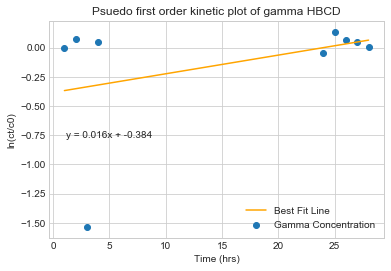

In [134]:
y = experiment_s_df['Gamma Concentration']
learning_rate = .0001
iterations = 200000
weight,bias = train(time,y,0,0,learning_rate,iterations)
weight = round(weight,3)
bias = round(bias, 3)
trend_line_x = [time[0] , time[8]]
trend_line_y = [weight * time[0] + bias, weight * time[8] + bias]
equation = 'y = ' + str(weight) + 'x + ' + str(bias)
plt.scatter(time,y)
plt.plot(trend_line_x,trend_line_y,color='orange',label='Best Fit Line')
plt.xlabel('Time (hrs)')
plt.ylabel('ln(ct/c0)')
plt.title('Psuedo first order kinetic plot of gamma HBCD')
plt.text(5, -.75,equation, horizontalalignment='center',verticalalignment='center')
plt.legend()